Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
from imblearn.over_sampling import RandomOverSampler

Dataset

In [2]:
df_x = pd.read_csv("pima-indians-diabetes.data.csv", header=None)

In [3]:
df_x.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Add header row

In [4]:
df_x.columns = ['Times Pregnant', 'Plasma Glucose Concentration', 'Diastolic Blood Pressure', 'Triceps Skin Fold Thickness', '2-hour Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome']

In [5]:
df_x

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df_x.describe()

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


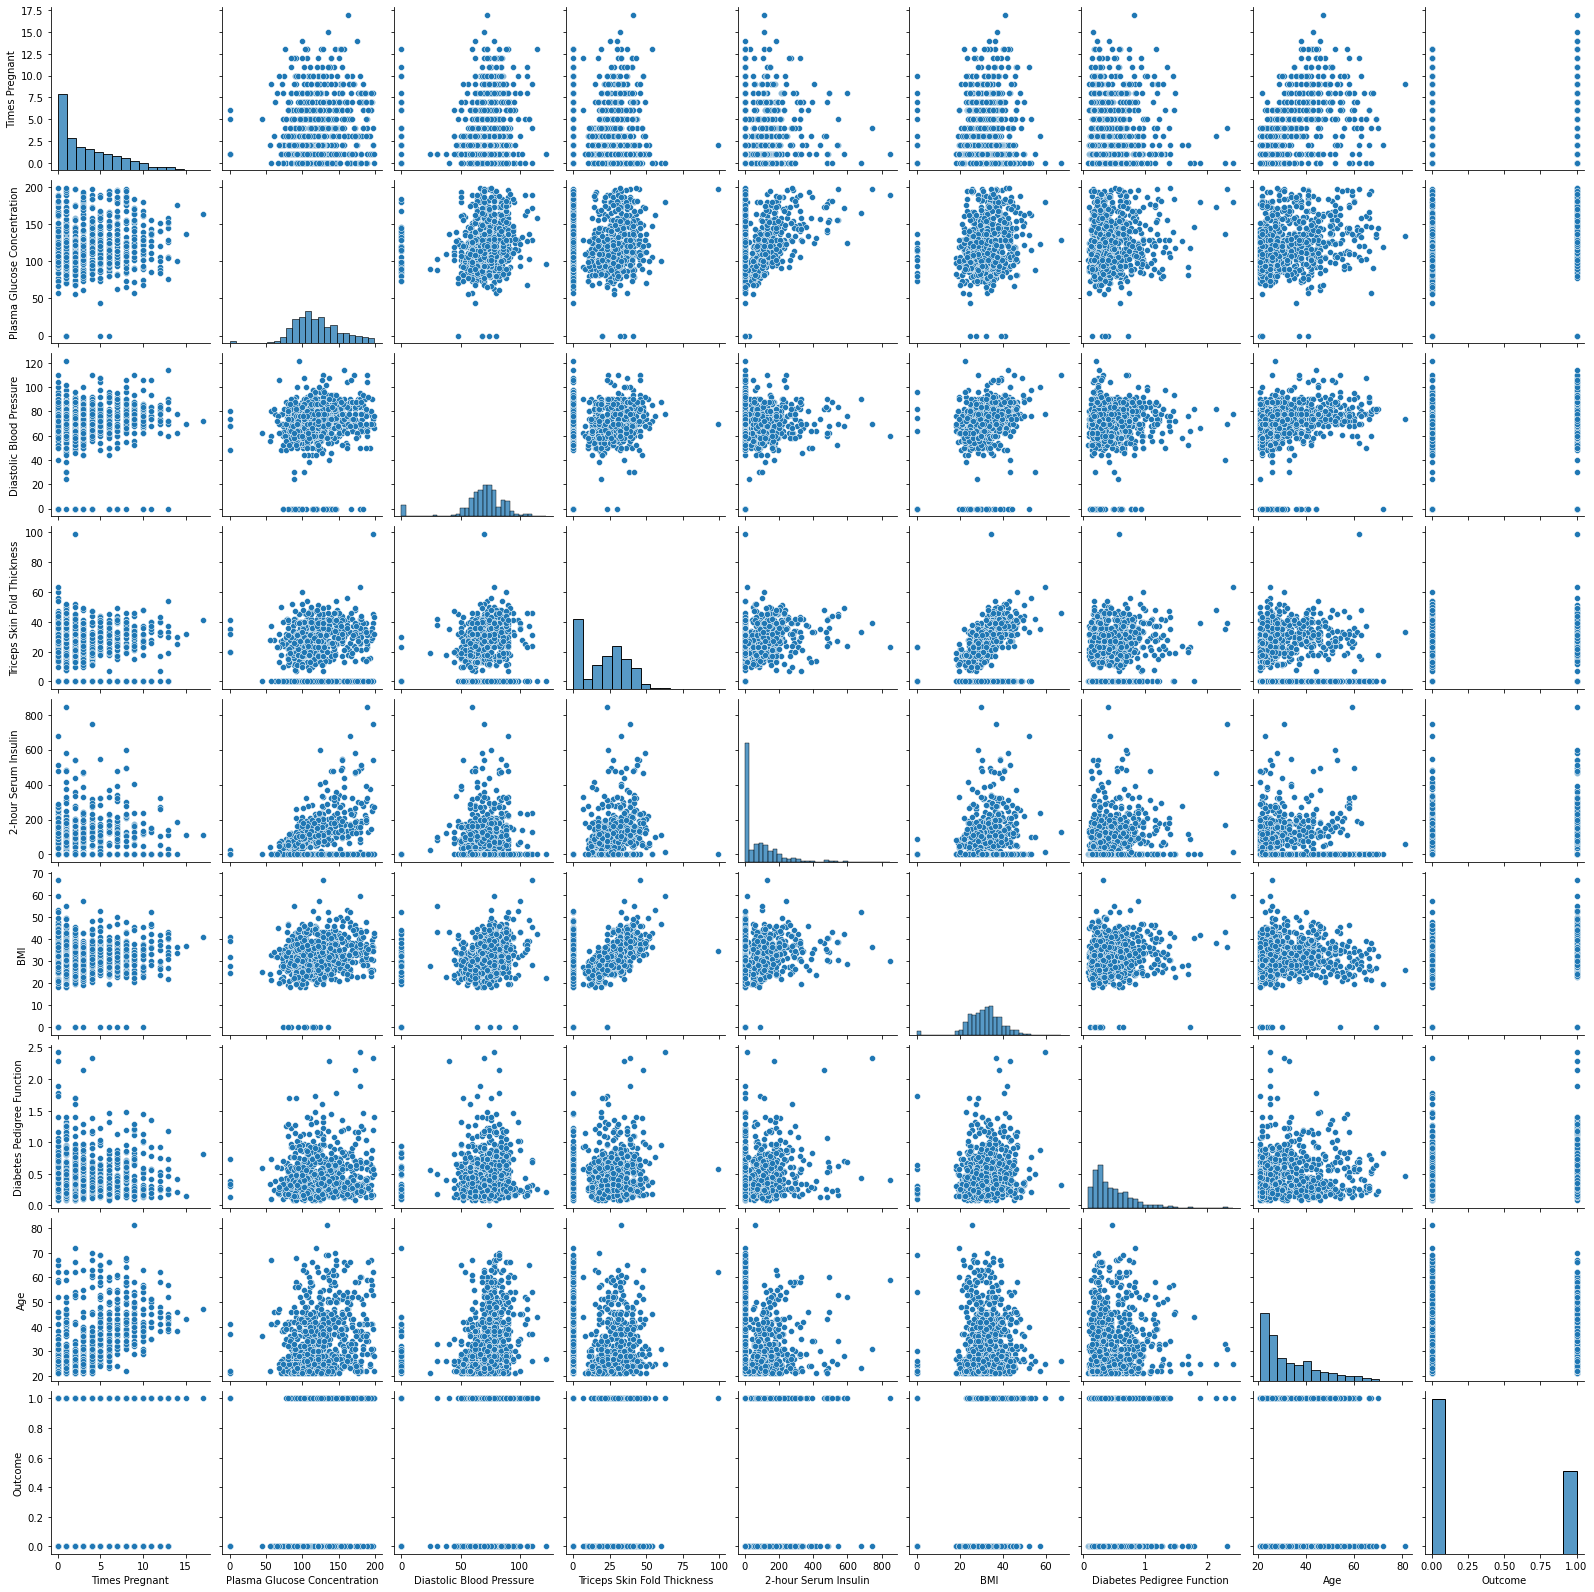

In [7]:
sns.pairplot(df_x)

<AxesSubplot:>

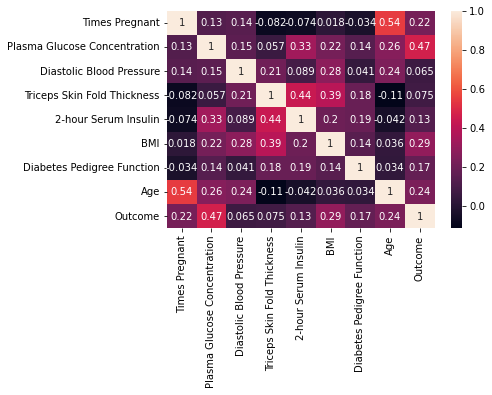

In [8]:
sns.heatmap(df_x.corr(),annot=True) #show correlation between predictor variables and Outcome

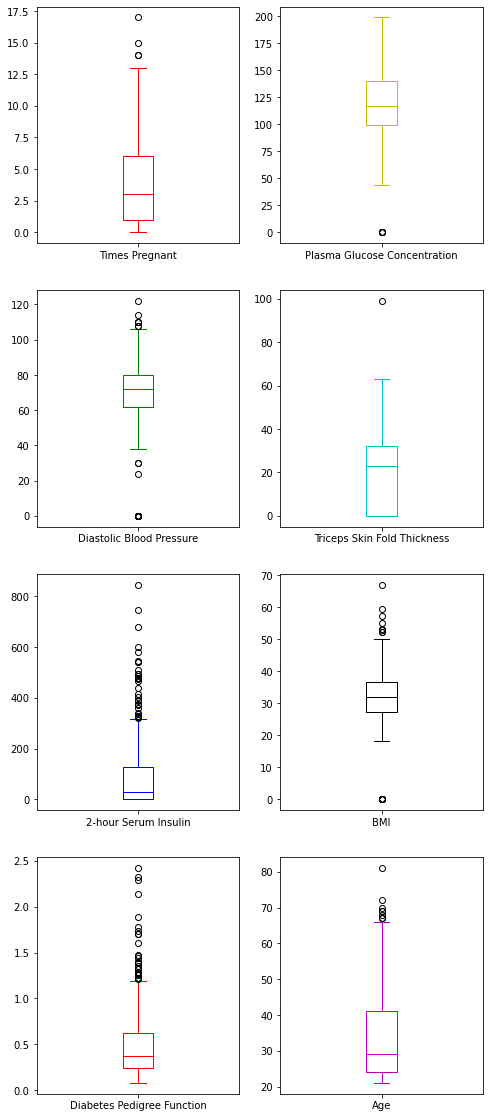

In [9]:
#Boxplot of raw data
col = df_x.columns
color = ['r', 'y', 'g', 'c', 'b', 'k', 'r','m']
plt.figure(figsize=(8, 20))
for i in range(len(col)-1):
    c = color[i]
    plt.subplot(4, 2, i+1)
    df_x[col[i]].plot(kind = 'box', color = c)

In [10]:
#Clearing Outliers using IQR method
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [11]:
index_list = []
for feature in ['Times Pregnant', 'Plasma Glucose Concentration', 'Diastolic Blood Pressure', 'Triceps Skin Fold Thickness', '2-hour Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']:
    index_list.extend(outliers(df_x,feature))

In [12]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [13]:
df_cleaned = remove(df_x, index_list)

In [14]:
df_cleaned.shape

(639, 9)

In [15]:
df_cleaned.round(3) #round off to 3 decimal places

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df_cleaned.describe()

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


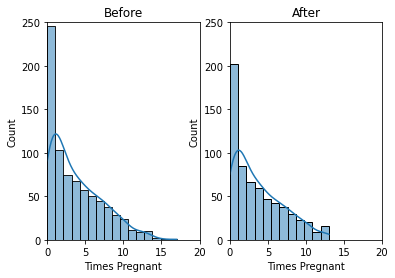

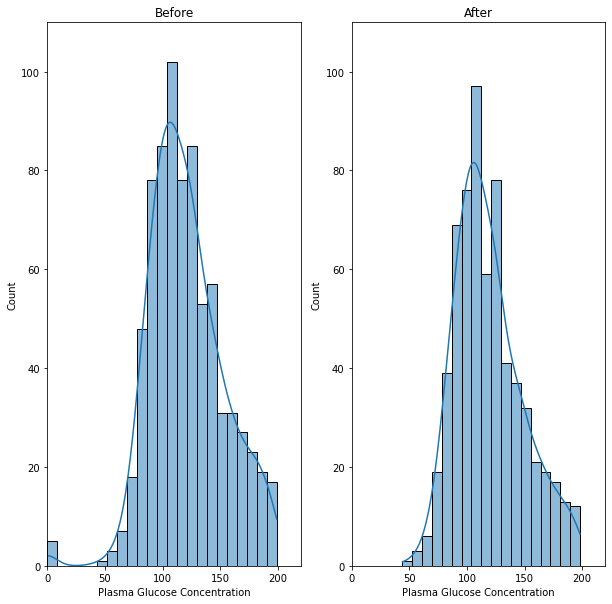

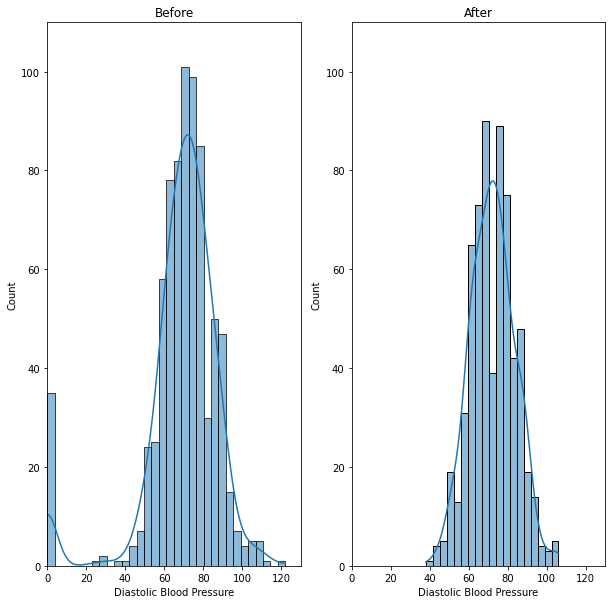

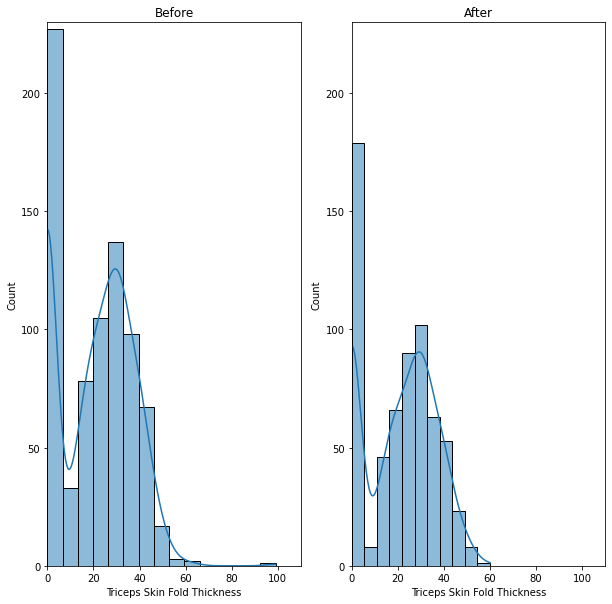

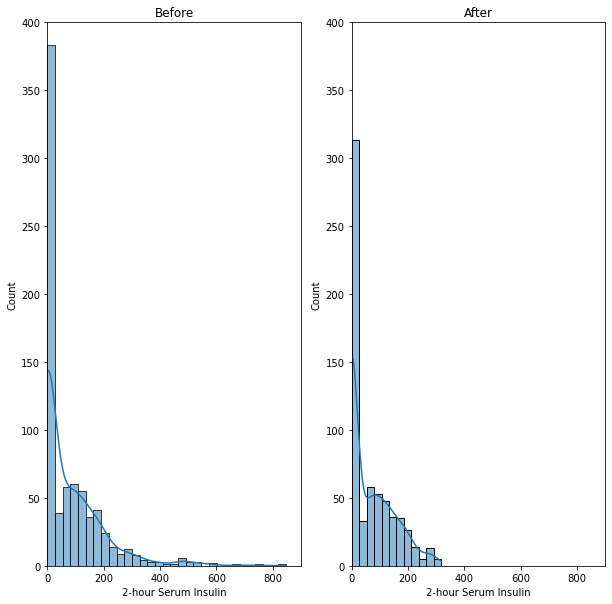

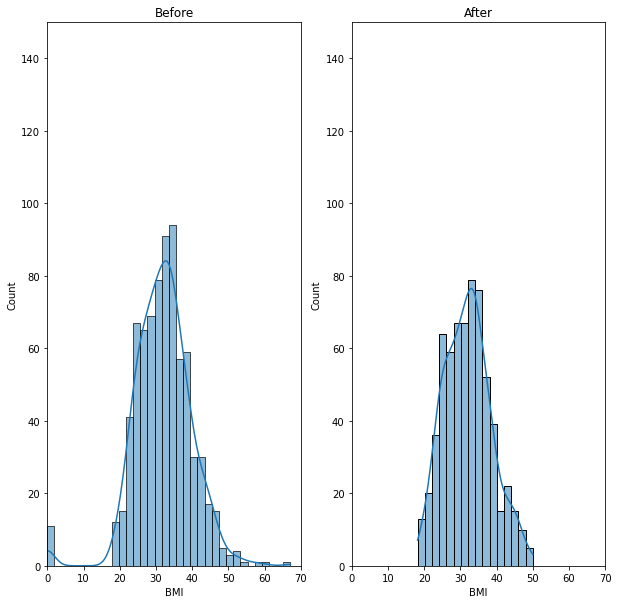

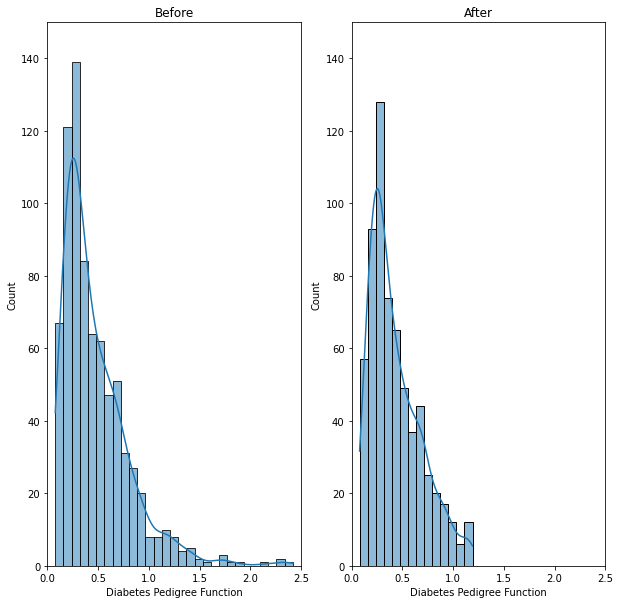

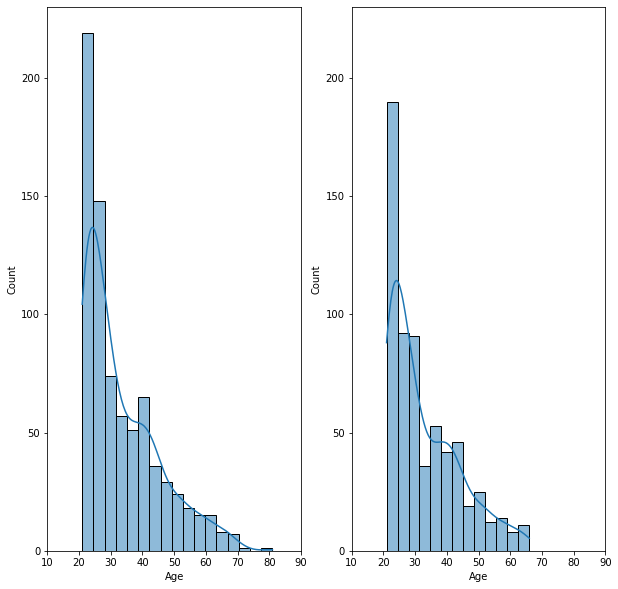

In [17]:
#Histograms of different predictor variables (Before/After cleaning data)
#Times Pregnant
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Times Pregnant',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 250)
sns.histplot(data=df_cleaned,x='Times Pregnant',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 250)
plt.show()

#Plasma Glucose Concentration
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Plasma Glucose Concentration',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 220)
ax1.set_ylim(0, 110)
sns.histplot(data=df_cleaned,x='Plasma Glucose Concentration',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 220)
ax2.set_ylim(0, 110)
plt.show()

#Diastolic Blood Pressure
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Diastolic Blood Pressure',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 130)
ax1.set_ylim(0, 110)
sns.histplot(data=df_cleaned,x='Diastolic Blood Pressure',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 130)
ax2.set_ylim(0, 110)
plt.show()

#Triceps Skin Fold Thickness
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Triceps Skin Fold Thickness',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 110)
ax1.set_ylim(0, 230)
sns.histplot(data=df_cleaned,x='Triceps Skin Fold Thickness',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 110)
ax2.set_ylim(0, 230)
plt.show()

#2-hour Serum Insulin
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='2-hour Serum Insulin',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 900)
ax1.set_ylim(0, 400)
sns.histplot(data=df_cleaned,x='2-hour Serum Insulin',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 900)
ax2.set_ylim(0, 400)
plt.show()

#BMI
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='BMI',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 70)
ax1.set_ylim(0, 150)
sns.histplot(data=df_cleaned,x='BMI',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 70)
ax2.set_ylim(0, 150)
plt.show()

#Diabetes Pedigree Function
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Diabetes Pedigree Function',kde=True, ax=ax1).set(title='Before')
ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 150)
sns.histplot(data=df_cleaned,x='Diabetes Pedigree Function',kde=True, ax=ax2).set(title='After')
ax2.set_xlim(0, 2.5)
ax2.set_ylim(0, 150)
plt.show()

#Age
fig,(ax1,ax2) = plt.subplots(1,2)
rcParams['figure.figsize'] = 10,10
sns.histplot(data=df_x,x='Age',kde=True, ax=ax1)
ax1.set_xlim(10, 90)
ax1.set_ylim(0, 230)
sns.histplot(data=df_cleaned,x='Age',kde=True, ax=ax2)
ax2.set_xlim(10, 90)
ax2.set_ylim(0, 230)
plt.show()

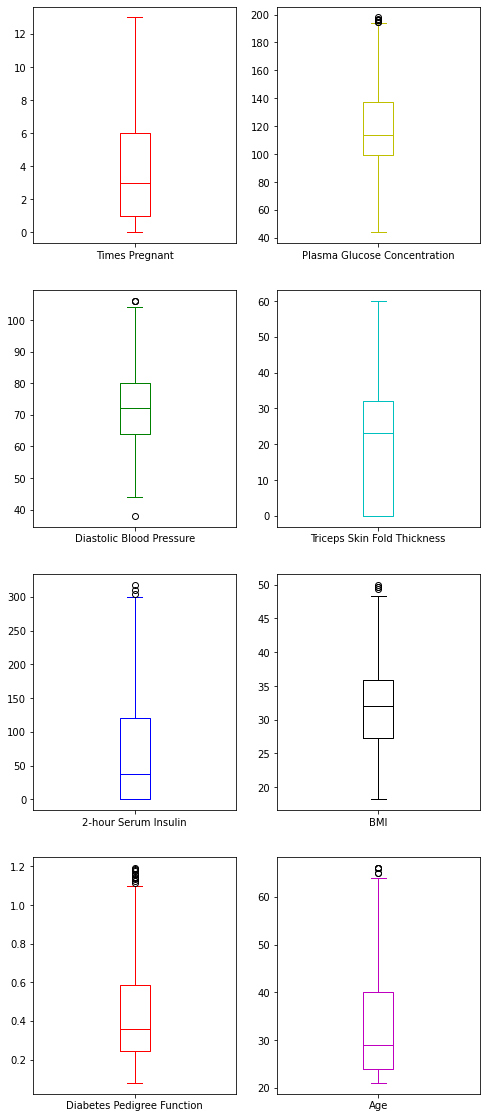

In [18]:
col = df_cleaned.columns
color = ['r', 'y', 'g', 'c', 'b', 'k', 'r','m']
plt.figure(figsize=(8, 20))
for i in range(len(col)-1):
    c = color[i]
    plt.subplot(4, 2, i+1)
    df_cleaned[col[i]].plot(kind = 'box', color = c)

Replacing 0s for selected predictor variables with median

In [19]:
# Checking the number of 0s for each predictor variable in the outlier-free dataset
(df_cleaned[:] == 0).sum()

# As observed below, 'Times Pregnant', 'Tricep Skin Fold Thickness' and '2-hour Serum Insulin' are the predictor variables
# with 0 values
# Only 'Tricep Skinfold Thickness' and '2-hour Serum Insulin' will be considered for the replacment of 0 values

Times Pregnant                   88
Plasma Glucose Concentration      0
Diastolic Blood Pressure          0
Triceps Skin Fold Thickness     179
2-hour Serum Insulin            307
BMI                               0
Diabetes Pedigree Function        0
Age                               0
Outcome                         439
dtype: int64

In [20]:
#Replace 0 values with median

median = df_cleaned['Triceps Skin Fold Thickness'].median()
print(median) #Print median value
df_cleaned['Triceps Skin Fold Thickness'] = df_cleaned['Triceps Skin Fold Thickness'].replace(0, median)

median = df_cleaned['2-hour Serum Insulin'].median()
print(median) #Print median value
df_cleaned['2-hour Serum Insulin'] = df_cleaned['2-hour Serum Insulin'].replace(0, median) 


23.0
37.0


(0.0, 400.0)

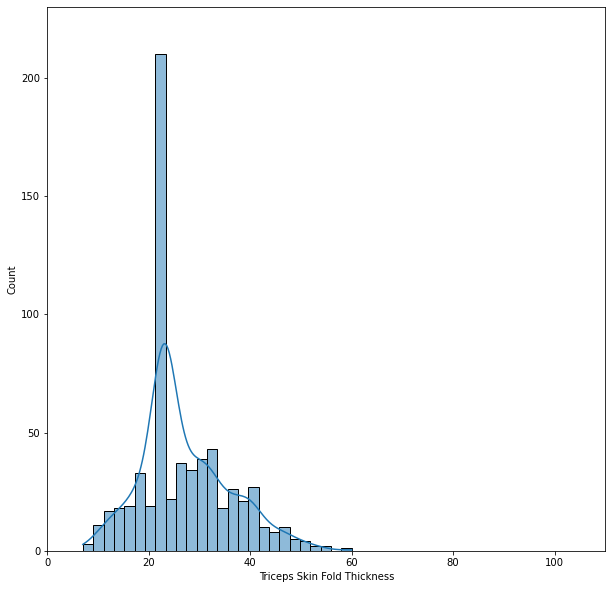

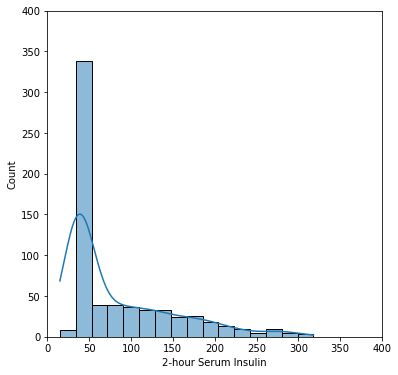

In [21]:
#Visualise data skewness of Tricep Skin Fold Thickness and 2-hour Serum Insulin with histograms
#Skewed to the right
#Triceps Skin Fold Thickness
fig,(ax1) = plt.subplots(1)
rcParams['figure.figsize'] = 6,6
sns.histplot(data=df_cleaned,x='Triceps Skin Fold Thickness',kde=True, ax=ax1)
ax1.set_xlim(0, 110)
ax1.set_ylim(0, 230)


#2-hour Serum Insulin
fig,(ax1) = plt.subplots(1)
rcParams['figure.figsize'] = 6,6
sns.histplot(data=df_cleaned,x='2-hour Serum Insulin',kde=True, ax=ax1)
ax1.set_xlim(0, 400)
ax1.set_ylim(0, 400)

In [22]:
# Checking the number of 0s for each predictor variable after replacing 0 values with median
(df_cleaned[:] == 0).sum()

Times Pregnant                   88
Plasma Glucose Concentration      0
Diastolic Blood Pressure          0
Triceps Skin Fold Thickness       0
2-hour Serum Insulin              0
BMI                               0
Diabetes Pedigree Function        0
Age                               0
Outcome                         439
dtype: int64

In [23]:
df_cleaned

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,37,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,23,37,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,23,37,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,37,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,23,37,30.1,0.349,47,1


Selecting Best Features
Methods:
- Heatmap to show correlation (Taking the top 4 highest Pearson's Correlation Coefficient values) 
- Univariate Statistical Test
- Using Violin Plots to compare the spread of each predictor variable with respect to the target variable: Outcome
- If the medians of every respective predictor variables are found at different heights or if the violinplots are significantly different in shape, this means the spreads for the paricular variable is differnet and the predictor variable is selected as part of the "Best Features"

<AxesSubplot:>

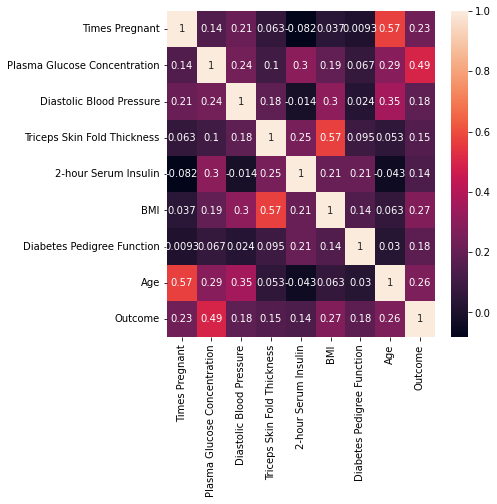

In [24]:
sns.heatmap(df_cleaned.corr(),annot=True)
#Predictor variables that have correlation values higher than 0.2 will be selected for the machine learning model

In [25]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
array = df_cleaned.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=f_classif, k=5) #use of Anova F-value test
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
VariableNames = ['Times Pregnant', 'Plasma Glucose Concentration', 'Diastolic Blood Pressure', 'Triceps Skin Fold Thickness', '2-hour Serum Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age']
K_scores=fit.scores_
pd.Series(data=K_scores,index=VariableNames,).sort_values(ascending = False)


Plasma Glucose Concentration    204.249213
BMI                              49.837547
Age                              47.467842
Times Pregnant                   34.925268
Diastolic Blood Pressure         22.146055
Diabetes Pedigree Function       21.103375
Triceps Skin Fold Thickness      14.865418
2-hour Serum Insulin             12.199981
dtype: float64

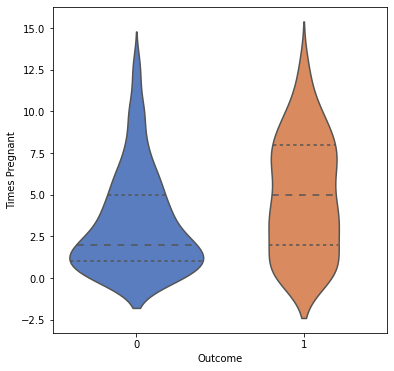

In [26]:
ax = sns.violinplot(x='Outcome', y='Times Pregnant',inner='quartile', data=df_cleaned, palette='muted', split=True)
#Median for Outcome = 1 is higher than for Outcome = 0
#Different shapes
#Best Feature 1

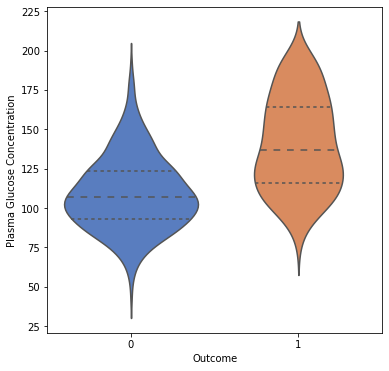

In [27]:
ax = sns.violinplot(x='Outcome', y='Plasma Glucose Concentration',inner='quartile', data=df_cleaned, palette='muted', split=True)
#Median for Outcome = 1 is higher than for Outcome = 0
#Different shapes
#Best Feature 2

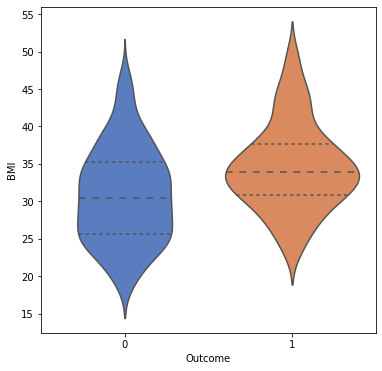

In [28]:
ax = sns.violinplot(x='Outcome', y='BMI',inner='quartile', data=df_cleaned, palette='muted', split=True)
#Median for Outcome = 1 is higher than for Outcome = 0
#Different shapes
#Best Feature 3

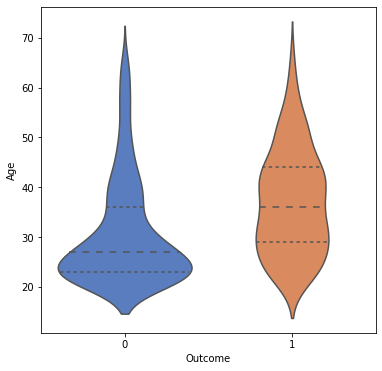

In [29]:
ax = sns.violinplot(x='Outcome', y='Age',inner='quartile', data=df_cleaned, palette='muted', split=True)
#Median for Outcome = 1 is higher than for Outcome = 0
#Different shapes
#Best Feature 4

In [30]:
#Show Data before dropping columns
df_cleaned

,Times Pregnant,Plasma Glucose Concentration,Diastolic Blood Pressure,Triceps Skin Fold Thickness,2-hour Serum Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,37,33.6,0.627,50,1
1,1,85,66,29,37,26.6,0.351,31,0
2,8,183,64,23,37,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,23,37,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,37,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,23,37,30.1,0.349,47,1


In [31]:
#Dropping unused features
df_new = df_cleaned.drop(df_cleaned.columns[[2,3,4,6]],axis=1)
df_new

,Times Pregnant,Plasma Glucose Concentration,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
5,5,116,25.6,30,0
...,...,...,...,...,...
763,10,101,32.9,63,0
764,2,122,36.8,27,0
765,5,121,26.2,30,0
766,1,126,30.1,47,1


Times Pregnant, Plasma Glucose Concentration, BMI and Age are the 4 best features selected for the prediction model

Random over-sampling:
0    439
1    439
Name: Outcome, dtype: int64


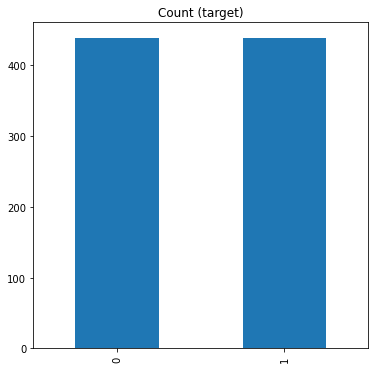

In [37]:
# Class count
count_class_0, count_class_1 = df_new.Outcome.value_counts()

# Divide by class
df_class_0 = df_new[df_new['Outcome'] == 0]
df_class_1 = df_new[df_new['Outcome'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True,random_state=101)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

#Oversampling data
print('Random over-sampling:')
print(df_test_over.Outcome.value_counts())

df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (target)');

In [38]:
#save oversampled data into new csv
df_test_over.round(3).to_csv('data_oversampled.csv', index=False)

Random under-sampling:
0    200
1    200
Name: Outcome, dtype: int64


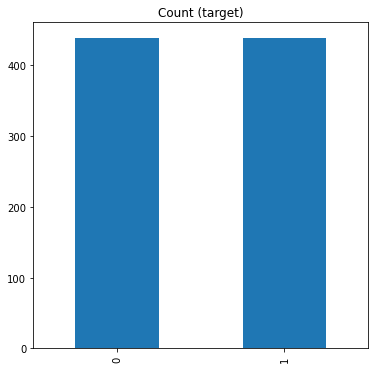

In [39]:
df_test_over.Outcome.value_counts().plot(kind='bar', title='Count (target)');

df_class_0_under = df_class_0.sample(count_class_1, replace=True, random_state=101)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

#Undersampling data
print('Random under-sampling:')
print(df_test_under.Outcome.value_counts())

df_test_under.Outcome.value_counts().plot(kind='bar', title='Count (target)');

In [40]:
#save undersampled data into new csv
df_test_under.round(3).to_csv('data_undersampled.csv', index=False)

In [41]:
#Save preprocessed and normalised dataset (imblanaced) into new CSV file
df_new.round(3).to_csv('data_preprocessed_normalised.csv', index=False)